<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BASIC LIBRARY FOR EXPLORATORY DATA ANALYSIS

In [1]:
!pip install mlxtend

In [6]:
!pip install openpyxl
!pip install --user xlsxwriter
!pip install xlrd==1.2.0

     |████████████████████████████████| 149 kB 5.1 MB/s 
     |████████████████████████████████| 103 kB 5.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [8]:
!pip3 uninstall openpyxl
!pip3 install openpyxl 

Found existing installation: openpyxl 2.5.9
Uninstalling openpyxl-2.5.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/openpyxl-2.5.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/openpyxl/*
Proceed (y/n)? y
  Successfully uninstalled openpyxl-2.5.9
     |████████████████████████████████| 242 kB 5.2 MB/s 


In [2]:
import numpy as numpy
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import warnings
from sklearn.preprocessing import normalize
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
%matplotlib inline
warnings.filterwarnings('ignore')



In [3]:
#Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
onl_Rtl_data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
onl_Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Finding the dimension of Dataset
onl_Rtl_data.shape

(541909, 8)

In [5]:
#Customer by Country
#Dropping duplicate values from the dataset
cust_by_count=onl_Rtl_data[['Country', 'CustomerID']].drop_duplicates()
cust_by_count.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [6]:
onl_Rtl_data = onl_Rtl_data.query("Country == 'United Kingdom'").reset_index(drop=True)

Finding the missing values in dataset

In [7]:
onl_Rtl_data.isnull().sum(axis=0)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [8]:
#Data cleaning
onl_Rtl_data['Description'] = onl_Rtl_data['Description'].str.strip() #removes spaces from beginning and end
onl_Rtl_data.dropna(axis=0, subset=['InvoiceNo'],inplace = True) #removes duplicate invoice
onl_Rtl_data['InvoiceNo'] = onl_Rtl_data['InvoiceNo'].astype('str') #converting invoice number to be string
onl_Rtl_data = onl_Rtl_data[~onl_Rtl_data['InvoiceNo'].str.contains('C')] #removes the cancelled transactions
onl_Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
onl_Rtl_data['Country'].value_counts()

United Kingdom    487622
Name: Country, dtype: int64

In [10]:
Ana_basket = (onl_Rtl_data
              .groupby(['InvoiceNo', 'Description'])['Quantity']
              .sum().unstack().reset_index().fillna(0)
              .set_index('InvoiceNo'))

In [11]:
Ana_basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,20713 wrongly marked,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,...,sold as set on dotcom,sold as set on dotcom and amazon,sold as set/6 by dotcom,sold in set?,sold with wrong barcode,stock check,stock creditted wrongly,taig adjust,taig adjust no stock,temp adjustment,test,throw away,thrown away,thrown away-can't sell,thrown away-can't sell.,to push order througha s stock was,water damage,water damaged,website fixed,wet,wet boxes,wet damaged,wet pallet,wet rusty,wet/rusty,wet?,wrong barcode,wrong barcode (22467),wrong code,wrong code?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
onl_Rtl_data.isnull().values.any()

True

In [13]:
onl_Rtl_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1455
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133277
Country             0
dtype: int64

In [14]:
onl_Rtl_data.isna().any()[lambda x: x]

Description    True
CustomerID     True
dtype: bool

In [15]:
onl_Rtl_data.loc[:, onl_Rtl_data.isna().any()]

,Description,CustomerID
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0
1,WHITE METAL LANTERN,17850.0
2,CREAM CUPID HEARTS COAT HANGER,17850.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0
...,...,...
495473,FAIRY TALE COTTAGE NIGHT LIGHT,15804.0
495474,LARGE CAKE STAND HANGING STRAWBERY,13113.0
495475,SET OF 3 HANGING OWLS OLLIE BEAK,13113.0
495476,RED RETROSPOT ROUND CAKE TINS,13113.0


In [21]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = Ana_basket.applymap(my_encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item
    

In [17]:
#print("No. of columns containing null values")
#print(len(onl_Rtl_data.columns[onl_Rtl_data.isna().any()]))

No. of columns containing null values
2


In [18]:
#onl_Rtl_data = onl_Rtl_data.drop(onl_Rtl_data.columns[onl_Rtl_data.isna().sum()>len(onl_Rtl_data.columns)],axis = 1)
#onl_Rtl_data = onl_Rtl_data.dropna(axis = 0).reset_index(drop=True)

In [22]:
#Generating frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [23]:
#generating rules
apr_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [24]:
basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

428

In [25]:
basket_sets['SPACEBOY LUNCH BOX'].sum()

701

In [26]:
onl_Rtl_data.describe()

,Quantity,UnitPrice
count,487622.000000,487622.000000
mean,9.283548,3.784579
std,166.142019,41.215060
min,-9600.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


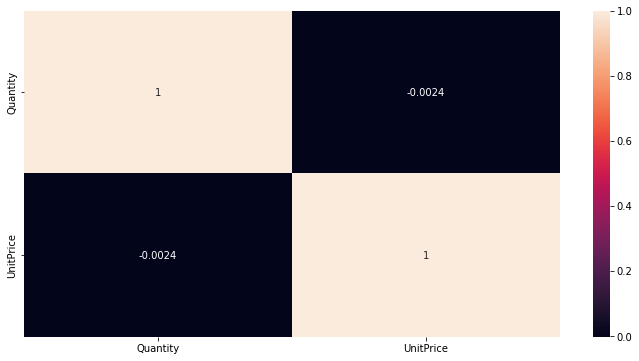

In [27]:
# Insert your code here ...
plt.figure(figsize=(12,6))
sns.heatmap(onl_Rtl_data.corr(),annot=True)
